checkout this kaggle kernel: https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=470167&userName=alexgomes3

---
# Google colab

In [0]:
  # Code to download the datasets (run only if dataset not found)
!mkdir input
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

test_downloaded = drive.CreateFile({'id': '1xBuctuuZBBvIjQmH0sg49Dx17CC1T2px'})
train_downloaded = drive.CreateFile({'id': '1aFyHjN9XXs051r_s1ydCfyq_5DWiCefJ'})
content_train = train_downloaded.GetContentFile("input/train.csv")
content_test = test_downloaded.GetContentFile("input/test.csv")

---

In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Using original images

In [16]:
df_train = pd.read_csv('../input/train.csv')

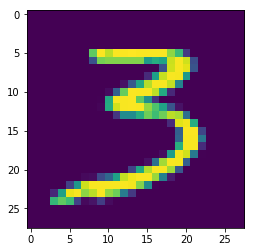

In [18]:
im_index = 5
first_image = df_train.iloc[25,1:].values.reshape(28,28)
plt.imshow(first_image)
plt.show()

# sample with 1k images

In [20]:
sample_1k = df_train.sample(1000)
X, y = sample_1k.drop(columns=['label']), sample_1k.label

X_train_1k_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(X, y, train_size=0.7)

C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Log regression

In [22]:
lr_1k = LogisticRegression()

In [26]:
%%timeit
lr.fit(X_train, y_train)

342 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit lr.predict(X_train)

5.06 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
